# This challenge is based on kaggle challenge by **RACHAEL TATMAN**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

nfl_data = pd.read_csv(r"NFL Play by Play 2009-2017 (v4).csv")
sf_permits = pd.read_csv(r"Building_Permits.csv")

np.random.seed(0) 

C:\Users\48781\AppData\Local\Temp\ipykernel_23060\3846244702.py:6: DtypeWarning: Columns (25,51) have mixed types. Specify dtype option on import or set low_memory=False.
  nfl_data = pd.read_csv(r"NFL Play by Play 2009-2017 (v4).csv")
C:\Users\48781\AppData\Local\Temp\ipykernel_23060\3846244702.py:7: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  sf_permits = pd.read_csv(r"Building_Permits.csv")


# Analysis of NFL data <br>
First we check general info like couple of first columns, shape, columns and data types.

In [3]:
nfl_data.head(10)

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009
5,2009-09-10,2009091000,2,1,1.0,13:16,14,3496.0,11.0,TEN,...,NaN,0.558929,0.441071,0.578453,0.421547,0.441071,-0.019524,NaN,NaN,2009
6,2009-09-10,2009091000,2,1,2.0,12:40,13,3460.0,36.0,TEN,...,0.163935,0.578453,0.421547,0.582881,0.417119,0.421547,-0.004427,-0.010456,0.006029,2009
7,2009-09-10,2009091000,2,1,3.0,12:11,13,3431.0,29.0,TEN,...,NaN,0.582881,0.417119,0.617544,0.382456,0.417119,-0.034663,NaN,NaN,2009
8,2009-09-10,2009091000,2,1,4.0,11:34,12,3394.0,37.0,TEN,...,NaN,0.617544,0.382456,0.591489,0.408511,0.382456,0.026054,NaN,NaN,2009
9,2009-09-10,2009091000,3,1,1.0,11:24,12,3384.0,10.0,TEN,...,0.541602,0.591489,0.408511,0.585405,0.414595,0.591489,-0.006084,-0.024526,0.018442,2009


In [4]:
nfl_data.describe()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
count,4.076880e+05,407688.000000,407688.000000,346534.000000,407688.000000,407464.000000,407244.000000,406848.000000,406848.000000,407688.000000,...,159190.000000,382734.000000,382734.000000,381101.000000,381101.000000,382679.000000,402147.000000,159187.000000,158926.000000,407688.000000
mean,2.013158e+09,12.316158,2.577412,2.002476,7.374200,1695.268944,20.576762,28.488327,48.644081,7.309403,...,-0.386086,0.534488,0.465965,0.534791,0.465613,0.501320,0.002099,0.015135,-0.010480,2013.018985
std,2.572839e+06,7.149527,1.129750,1.006353,4.642388,1062.801012,17.969326,12.946471,25.070416,4.869987,...,1.972715,0.285574,0.285629,0.287818,0.287867,0.287445,0.045363,0.056490,0.068139,2.576962
min,2.009091e+09,1.000000,1.000000,1.000000,0.000000,-900.000000,0.000000,1.000000,1.000000,0.000000,...,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.997214,-0.999881,-0.986673,2009.000000
25%,2.011101e+09,6.000000,2.000000,1.000000,3.000000,778.000000,5.000000,20.000000,30.000000,3.000000,...,-0.961115,0.325123,0.231411,0.321701,0.227694,0.276472,-0.014728,-0.011518,-0.018683,2011.000000
50%,2.013111e+09,12.000000,3.000000,2.000000,7.000000,1800.000000,17.000000,30.000000,49.000000,9.000000,...,0.000000,0.531274,0.469052,0.533609,0.466670,0.504470,0.000000,0.003441,0.000000,2013.000000
75%,2.015121e+09,18.000000,4.000000,3.000000,11.000000,2585.000000,37.000000,39.000000,70.000000,10.000000,...,0.485508,0.769232,0.675530,0.772882,0.678833,0.725477,0.014684,0.035792,0.011431,2015.000000
max,2.017123e+09,35.000000,5.000000,4.000000,15.000000,3600.000000,943.000000,50.000000,99.000000,50.000000,...,9.559834,1.000000,1.000000,1.000000,1.000000,1.000000,0.994848,0.994848,1.000000,2017.000000


In [6]:
nfl_data.columns

Index(['Date', 'GameID', 'Drive', 'qtr', 'down', 'time', 'TimeUnder',
       'TimeSecs', 'PlayTimeDiff', 'SideofField',
       ...
       'yacEPA', 'Home_WP_pre', 'Away_WP_pre', 'Home_WP_post', 'Away_WP_post',
       'Win_Prob', 'WPA', 'airWPA', 'yacWPA', 'Season'],
      dtype='object', length=102)

In [7]:
nfl_data.dtypes

Date         object
GameID        int64
Drive         int64
qtr           int64
down        float64
             ...   
Win_Prob    float64
WPA         float64
airWPA      float64
yacWPA      float64
Season        int64
Length: 102, dtype: object

In [16]:
nfl_data.shape

(407688, 102)

In [37]:
missing_values = nfl_data.isna().sum()

total_cells = np.product(nfl_data.shape)
total_missing = missing_values.sum()

(total_missing/total_cells) * 100

27.66722370547874

Percentage of missing values is quite high

In [9]:
nfl_data.dropna()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


If we want to drop all rows with at least one missing value, we would end up with nothing <br>
That means the data is quite messy, the missing values could mean no record or no reason to record 

Now let's look what will happed when we drop all columns with MV

In [10]:
nfl_dropped = nfl_data.dropna(axis=1)
nfl_dropped.head()


,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,PlayAttempted,Yards.Gained,sp,...,AwayTeam,Timeout_Indicator,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,ExPoint_Prob,TwoPoint_Prob,Season
0,2009-09-10,2009091000,1,1,15,0,0,1,39,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
1,2009-09-10,2009091000,1,1,15,10,5,1,5,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
2,2009-09-10,2009091000,1,1,15,5,2,1,-3,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
3,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009
4,2009-09-10,2009091000,1,1,14,8,2,1,0,0,...,TEN,0,3,3,3,3,3,0.0,0.0,2009


In [11]:
difference_ms_nfl = nfl_data.shape[1]-nfl_dropped.shape[1]
(difference_ms_nfl/nfl_data.shape[1])*100

63.725490196078425

By dropping only columns with missing values, we dropped almost 64% of them

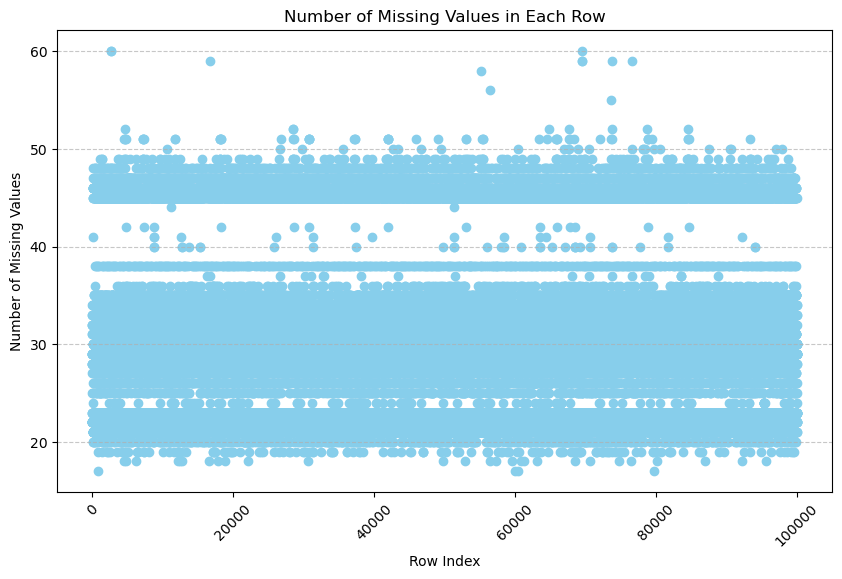

In [19]:
subset_nf=nfl_data[:100000]
missing_values_per_row = subset_nf.isnull().sum(axis=1)

plt.figure(figsize=(10, 6))
plt.scatter(missing_values_per_row.index, missing_values_per_row, color='skyblue')
plt.title('Number of Missing Values in Each Row')
plt.xlabel('Row Index')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Sampling 100000 first observations we can see a couple of deviations, the maount of missing values in each row varies from 20 to 50

### Trying different methods of filling missing values

In [20]:
subset_nfl = nfl_data.loc[:, 'EPA':'Season'].head()
subset_nfl

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009


In [21]:
fill_zeros = subset_nfl.fillna(0)
fill_zeros.head()

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


Here we fill them all with one value - 0

In [22]:
fill_bf = subset_nfl.fillna(method = 'bfill', axis=0).fillna(0)
fill_bf.head()

C:\Users\48781\AppData\Local\Temp\ipykernel_23060\58406136.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fill_bf = subset_nfl.fillna(method = 'bfill', axis=0).fillna(0)


,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009


Here we replace all missing values with the value that is directly after <br>
All remaining missing values are equal 0

In [23]:
fill_ff = subset_nfl.fillna(method = 'ffill', axis=0).fillna(0)
fill_ff.head()

C:\Users\48781\AppData\Local\Temp\ipykernel_23060\3084275837.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fill_ff = subset_nfl.fillna(method = 'ffill', axis=0).fillna(0)


,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009
2,-1.402760,-1.068169,1.146076,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,-0.032244,0.036899,2009
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009
4,2.097796,3.318841,-5.031425,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.106663,-0.156239,2009


Here we replace all missing values with the value that is directly before <br>
All remaining missing values are equal 0

# Now we can begin the analysis of SF permits <br>
As in NFL data, we first check head, shape, types and columns

In [26]:
sf_permits.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [24]:
sf_permits.shape

(198900, 43)

In [38]:
sf_permits.dtypes

Permit Number                              object
Permit Type                                 int64
Permit Type Definition                     object
Permit Creation Date                       object
Block                                      object
Lot                                        object
Street Number                               int64
Street Number Suffix                       object
Street Name                                object
Street Suffix                              object
Unit                                      float64
Unit Suffix                                object
Description                                object
Current Status                             object
Current Status Date                        object
Filed Date                                 object
Issued Date                                object
Completed Date                             object
First Construction Document Date           object
Structural Notification                    object


Here we can observe more objects than in NFL data

In [25]:
sf_permits.columns

Index(['Permit Number', 'Permit Type', 'Permit Type Definition',
       'Permit Creation Date', 'Block', 'Lot', 'Street Number',
       'Street Number Suffix', 'Street Name', 'Street Suffix', 'Unit',
       'Unit Suffix', 'Description', 'Current Status', 'Current Status Date',
       'Filed Date', 'Issued Date', 'Completed Date',
       'First Construction Document Date', 'Structural Notification',
       'Number of Existing Stories', 'Number of Proposed Stories',
       'Voluntary Soft-Story Retrofit', 'Fire Only Permit',
       'Permit Expiration Date', 'Estimated Cost', 'Revised Cost',
       'Existing Use', 'Existing Units', 'Proposed Use', 'Proposed Units',
       'Plansets', 'TIDF Compliance', 'Existing Construction Type',
       'Existing Construction Type Description', 'Proposed Construction Type',
       'Proposed Construction Type Description', 'Site Permit',
       'Supervisor District', 'Neighborhoods - Analysis Boundaries', 'Zipcode',
       'Location', 'Record ID'],
     

In [27]:
missing_values_sf = sf_permits.isna().sum()

total_cells_sf = np.product(sf_permits.shape)
total_missing_sf = missing_values_sf.sum()

(total_missing_sf/total_cells_sf) * 100

26.26002315058403

The amount of missing values is around the same % in both cases

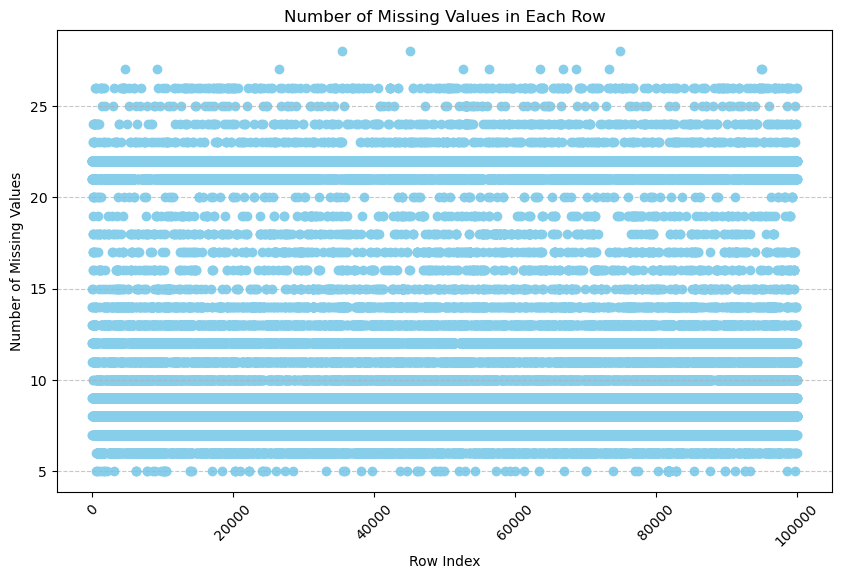

In [28]:
subset_sf=sf_permits[:100000]
missing_values_per_row = subset_sf.isnull().sum(axis=1)

plt.figure(figsize=(10, 6))
plt.scatter(missing_values_per_row.index, missing_values_per_row, color='skyblue')
plt.title('Number of Missing Values in Each Row')
plt.xlabel('Row Index')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Sampling 100 000 observations, the number of missing values in each row deviated between 5 and 25 with few outliers

In [29]:
sf_permits.dropna()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID


Again, this dataset also contains at least one missing value in each row

In [30]:
sf_drop_cols = sf_permits.dropna(axis=1)
sf_drop_cols

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Current Status,Current Status Date,Filed Date,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,expired,12/21/2017,05/06/2015,1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,issued,08/03/2017,04/19/2016,1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,withdrawn,09/26/2017,05/27/2016,1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,complete,07/24/2017,11/07/2016,1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,issued,12/01/2017,11/28/2016,144548169992
...,...,...,...,...,...,...,...,...,...,...,...,...
198895,M862628,8,otc alterations permit,12/05/2017,0113,017A,1228,Montgomery,issued,12/05/2017,12/05/2017,1489337276729
198896,201712055595,8,otc alterations permit,12/05/2017,0271,014,580,Bush,issued,12/06/2017,12/05/2017,1489462354993
198897,M863507,8,otc alterations permit,12/06/2017,4318,019,1568,Indiana,issued,12/06/2017,12/06/2017,1489539379952
198898,M863747,8,otc alterations permit,12/06/2017,0298,029,795,Sutter,issued,12/06/2017,12/06/2017,1489608233656


In [32]:
((sf_permits.shape[1]-sf_drop_cols.shape[1])/sf_permits.shape[1])*100

72.09302325581395

Dropping only columns, we dropped around 72% of them

### Now we are going to try different missing values filling methods

In [33]:
subset_sf = sf_permits.loc[:, 'Street Number Suffix':'Zipcode'].head()
subset_sf

,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,...,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode
0,NaN,Ellis,St,NaN,NaN,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,...,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0
1,NaN,Geary,St,0.0,NaN,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,...,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0
2,NaN,Pacific,Av,NaN,NaN,installation of separating wall,withdrawn,09/26/2017,05/27/2016,NaN,...,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0
3,NaN,Pacific,Av,0.0,NaN,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,...,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0
4,NaN,Market,St,NaN,NaN,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,...,2.0,NaN,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0


In [34]:
subset_sf.fillna(0)

,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,...,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode
0,0,Ellis,St,0.0,0,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,...,2.0,0,3.0,constr type 3,0.0,0,0,3.0,Tenderloin,94102.0
1,0,Geary,St,0.0,0,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,...,2.0,0,3.0,constr type 3,0.0,0,0,3.0,Tenderloin,94102.0
2,0,Pacific,Av,0.0,0,installation of separating wall,withdrawn,09/26/2017,05/27/2016,0,...,2.0,0,1.0,constr type 1,1.0,constr type 1,0,3.0,Russian Hill,94109.0
3,0,Pacific,Av,0.0,0,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,...,2.0,0,5.0,wood frame (5),5.0,wood frame (5),0,3.0,Nob Hill,94109.0
4,0,Market,St,0.0,0,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,...,2.0,0,3.0,constr type 3,0.0,0,0,6.0,Tenderloin,94102.0


Here we are replacing them all with one value - 0

In [35]:
fill_bf_sf= subset_sf.fillna(method = 'bfill', axis=0).fillna(0)
fill_bf_sf

C:\Users\48781\AppData\Local\Temp\ipykernel_23060\542429517.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fill_bf_sf= subset_sf.fillna(method = 'bfill', axis=0).fillna(0)


,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,...,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode
0,0.0,Ellis,St,0.0,0.0,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,...,2.0,0.0,3.0,constr type 3,1.0,constr type 1,0.0,3.0,Tenderloin,94102.0
1,0.0,Geary,St,0.0,0.0,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,...,2.0,0.0,3.0,constr type 3,1.0,constr type 1,0.0,3.0,Tenderloin,94102.0
2,0.0,Pacific,Av,0.0,0.0,installation of separating wall,withdrawn,09/26/2017,05/27/2016,07/18/2017,...,2.0,0.0,1.0,constr type 1,1.0,constr type 1,0.0,3.0,Russian Hill,94109.0
3,0.0,Pacific,Av,0.0,0.0,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,...,2.0,0.0,5.0,wood frame (5),5.0,wood frame (5),0.0,3.0,Nob Hill,94109.0
4,0.0,Market,St,0.0,0.0,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,...,2.0,0.0,3.0,constr type 3,0.0,0,0.0,6.0,Tenderloin,94102.0


Here we are filling them with a value that is directly after <br>
All other missing values are equal 0

In [36]:
fill_ff_sf = subset_sf.fillna(method = 'ffill', axis=0).fillna(0)
fill_ff_sf

C:\Users\48781\AppData\Local\Temp\ipykernel_23060\4223010441.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  fill_ff_sf = subset_sf.fillna(method = 'ffill', axis=0).fillna(0)


,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,...,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode
0,0.0,Ellis,St,0.0,0.0,"ground fl facade: to erect illuminated, electr...",expired,12/21/2017,05/06/2015,11/09/2015,...,2.0,0.0,3.0,constr type 3,0.0,0,0.0,3.0,Tenderloin,94102.0
1,0.0,Geary,St,0.0,0.0,remove (e) awning and associated signs.,issued,08/03/2017,04/19/2016,08/03/2017,...,2.0,0.0,3.0,constr type 3,0.0,0,0.0,3.0,Tenderloin,94102.0
2,0.0,Pacific,Av,0.0,0.0,installation of separating wall,withdrawn,09/26/2017,05/27/2016,08/03/2017,...,2.0,0.0,1.0,constr type 1,1.0,constr type 1,0.0,3.0,Russian Hill,94109.0
3,0.0,Pacific,Av,0.0,0.0,repair dryrot & stucco at front of bldg.,complete,07/24/2017,11/07/2016,07/18/2017,...,2.0,0.0,5.0,wood frame (5),5.0,wood frame (5),0.0,3.0,Nob Hill,94109.0
4,0.0,Market,St,0.0,0.0,demolish retail/office/commercial 3-story buil...,issued,12/01/2017,11/28/2016,12/01/2017,...,2.0,0.0,3.0,constr type 3,5.0,wood frame (5),0.0,6.0,Tenderloin,94102.0


Here we are filling them with a value that is directly before <br>
All other missing values are equal 0